<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/MachineLeaning/blob/main/Hopfield_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

# 홉필드 네트워크 클래스 정의
class HopfieldNetwork:
    def __init__(self, num_neurons):
        # 가중치 행렬 초기화 (대칭 행렬)
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        # 패턴 학습 (가중치 행렬 업데이트)
        for pattern in patterns:
            # 패턴을 열 벡터로 변환
            pattern = pattern.reshape(-1, 1)
            # 외적을 통해 가중치 행렬 업데이트
            self.weights += np.dot(pattern, pattern.T)
        # 대각선 요소는 0으로 설정 (자기 연결 제거)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        # 패턴 복원
        for _ in range(steps):
            for i in range(len(pattern)):
                # 노드 i의 값 업데이트
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

# 네트워크 생성 및 학습 패턴 정의
num_neurons = 4  # 네트워크의 뉴런 수
patterns = np.array([[1, -1, 1, -1], [-1, 1, -1, 1]])

# 네트워크 초기화 및 학습
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 복원을 위한 테스트 패턴 정의 (손상된 패턴)
test_pattern = np.array([1, -1, -1, -1])

# 패턴 복원 시도
recalled_pattern = hopfield_net.recall(test_pattern.copy())
print("복원된 패턴:", recalled_pattern)

# 결과 비교
print("손상된 패턴:", test_pattern)
print("복원된 패턴:", recalled_pattern)

복원된 패턴: [ 1 -1  1 -1]
손상된 패턴: [ 1 -1 -1 -1]
복원된 패턴: [ 1 -1  1 -1]


In [3]:
import numpy as np

# 홉필드 네트워크 클래스 정의
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        # 패턴 학습 (가중치 행렬 업데이트)
        for pattern in patterns:
            # 패턴을 열 벡터로 변환
            pattern = pattern.reshape(-1, 1)
            # 외적을 통해 가중치 행렬 업데이트
            self.weights += np.dot(pattern, pattern.T)
        # 대각선 요소는 0으로 설정 (자기 연결 제거)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        # 패턴 복원
        for _ in range(steps):
            for i in range(self.num_neurons):
                # 노드 i의 값 업데이트
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

# 네트워크 생성 및 학습 패턴 정의
num_neurons = 8  # 네트워크의 뉴런 수
patterns = np.array([
    [1, -1, 1, -1, 1, -1, 1, -1],
    [-1, -1, 1, 1, -1, -1, 1, 1],
    [1, 1, -1, -1, 1, 1, -1, -1]
])

# 네트워크 초기화 및 학습
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 손상된 테스트 패턴들
test_patterns = [
    np.array([1, -1, -1, -1, 1, -1, 1, -1]),  # 첫 번째 패턴 손상
    np.array([-1, -1, 1, -1, -1, -1, 1, 1]),  # 두 번째 패턴 손상
    np.array([1, 1, -1, 1, 1, 1, -1, -1])     # 세 번째 패턴 손상
]

# 각 손상된 패턴 복원
for i, test_pattern in enumerate(test_patterns):
    recalled_pattern = hopfield_net.recall(test_pattern.copy())
    print(f"손상된 패턴 {i+1}: {test_pattern}")
    print(f"복원된 패턴 {i+1}: {recalled_pattern}")


손상된 패턴 1: [ 1 -1 -1 -1  1 -1  1 -1]
복원된 패턴 1: [ 1  1 -1 -1  1  1 -1 -1]
손상된 패턴 2: [-1 -1  1 -1 -1 -1  1  1]
복원된 패턴 2: [-1 -1  1  1 -1 -1  1  1]
손상된 패턴 3: [ 1  1 -1  1  1  1 -1 -1]
복원된 패턴 3: [ 1  1 -1 -1  1  1 -1 -1]


In [5]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# Import the font_manager module from matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

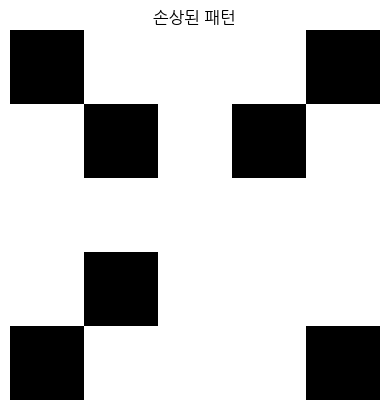

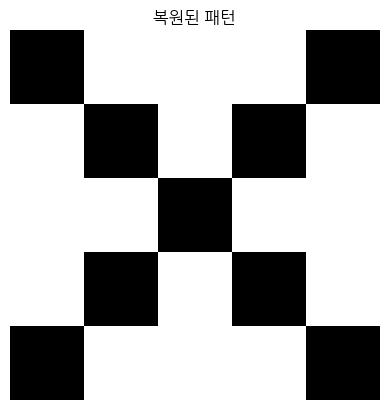

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 홉필드 네트워크 클래스 정의
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        for _ in range(steps):
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

# 5x5 패턴 정의 (이진 패턴으로 변환)
patterns = [
    np.array([
        [1, -1, -1, -1, 1],
        [-1, 1, -1, 1, -1],
        [-1, -1, 1, -1, -1],
        [-1, 1, -1, 1, -1],
        [1, -1, -1, -1, 1]
    ]),
    np.array([
        [-1, -1, -1, 1, 1],
        [-1, -1, 1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, -1, 1, 1]
    ])
]

# 5x5 패턴을 1차원 배열로 변환
patterns = [pattern.flatten() for pattern in patterns]

# 네트워크 초기화 및 패턴 학습
num_neurons = 25  # 5x5 이미지이므로 25개의 뉴런 사용
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 손상된 패턴 테스트
damaged_pattern = np.array([
    [1, -1, -1, -1, 1],
    [-1, 1, -1, 1, -1],
    [-1, -1, -1, -1, -1],
    [-1, 1, -1, -1, -1],
    [1, -1, -1, -1, 1]
]).flatten()

# 손상된 패턴 복원
recalled_pattern = hopfield_net.recall(damaged_pattern.copy())

# 결과 시각화 함수
def plot_pattern(pattern, title):
    pattern = pattern.reshape(5, 5)
    plt.imshow(pattern, cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 손상된 패턴과 복원된 패턴 출력
plot_pattern(damaged_pattern, "손상된 패턴")
plot_pattern(recalled_pattern, "복원된 패턴")


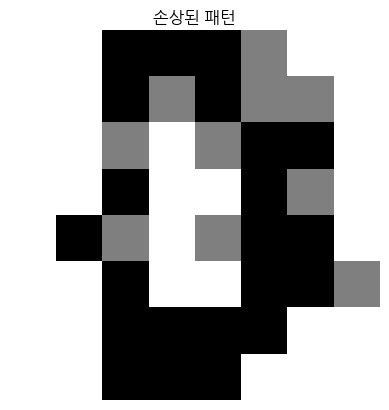

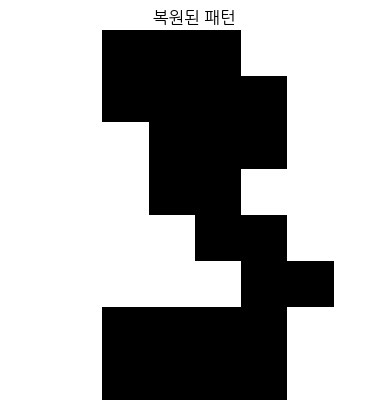

In [7]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 홉필드 네트워크 클래스 정의
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        for _ in range(steps):
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

# 데이터셋 불러오기 및 이진화
digits = load_digits()
images = digits.images[:4]  # 처음 4개의 이미지를 사용
labels = digits.target[:4]  # 레이블 확인용

# 이진화 함수: 픽셀 값을 1과 -1로 변환
def binarize_image(image):
    return np.where(image > image.mean(), 1, -1)

# 8x8 이미지 데이터를 1차원 벡터로 변환
patterns = [binarize_image(img).flatten() for img in images]

# 네트워크 초기화 및 학습
num_neurons = 64  # 8x8 이미지이므로 64개의 뉴런 사용
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 손상된 패턴 생성 (임의의 픽셀을 0으로 변경)
damaged_pattern = patterns[0].copy()  # 첫 번째 패턴 사용
noise_indices = np.random.choice(64, 10, replace=False)  # 10개의 픽셀을 손상
damaged_pattern[noise_indices] = 0  # 일부 픽셀 손상

# 손상된 패턴 복원
recalled_pattern = hopfield_net.recall(damaged_pattern.copy())

# 결과 시각화 함수
def plot_pattern(pattern, title):
    pattern = pattern.reshape(8, 8)
    plt.imshow(pattern, cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 손상된 패턴과 복원된 패턴 출력
plot_pattern(damaged_pattern, "손상된 패턴")
plot_pattern(recalled_pattern, "복원된 패턴")


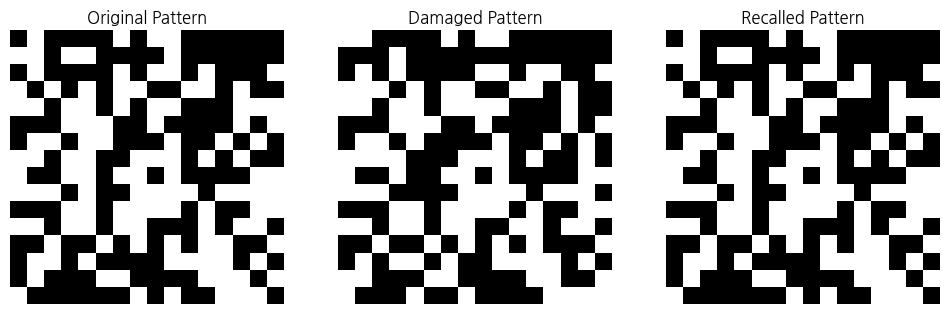

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 홉필드 네트워크 클래스 정의
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        for _ in range(steps):
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

# 더미 이미지 생성 및 전처리 함수
def preprocess_image(size=(16, 16)):
    # 더미 이미지 생성 (랜덤 패턴)
    img = np.random.randint(0, 2, size=size).astype(np.float32)  # float32 타입 사용
    # -1과 1로 변환
    img[img == 0] = -1
    return img.flatten()

# 패턴 생성
patterns = [preprocess_image() for _ in range(2)]

# 네트워크 초기화 및 학습
num_neurons = 256  # 16x16 이미지
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 손상된 패턴 생성
original_pattern = patterns[0]
damaged_pattern = original_pattern.copy()
noise_indices = np.random.choice(num_neurons, 30, replace=False)
damaged_pattern[noise_indices] *= -1

# 패턴 복원
recalled_pattern = hopfield_net.recall(damaged_pattern.copy())

# 시각화 함수
def plot_comparison(original, damaged, recalled):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    images = [original, damaged, recalled]
    titles = ["Original Pattern", "Damaged Pattern", "Recalled Pattern"]

    for ax, img, title in zip(axes, images, titles):
        img_reshaped = img.reshape(16, 16)
        ax.imshow(img_reshaped, cmap='binary')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# 결과 시각화
plot_comparison(original_pattern, damaged_pattern, recalled_pattern)

Training Patterns:


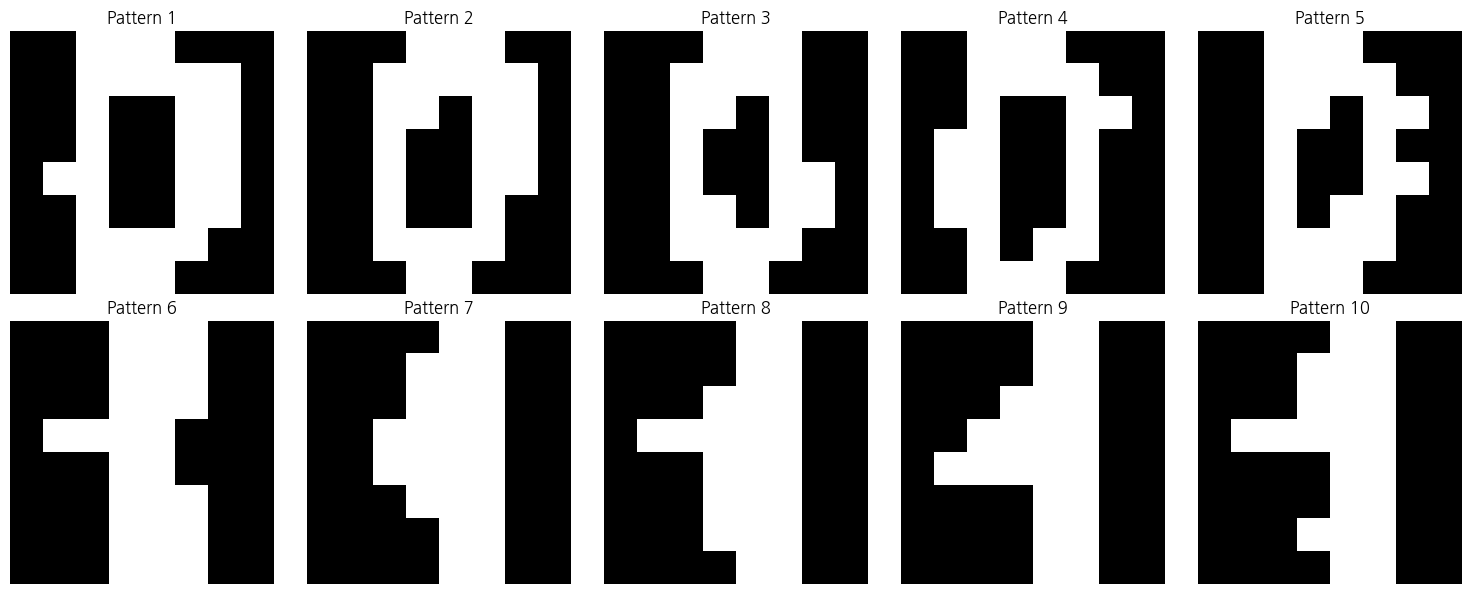


Pattern Recovery Test:


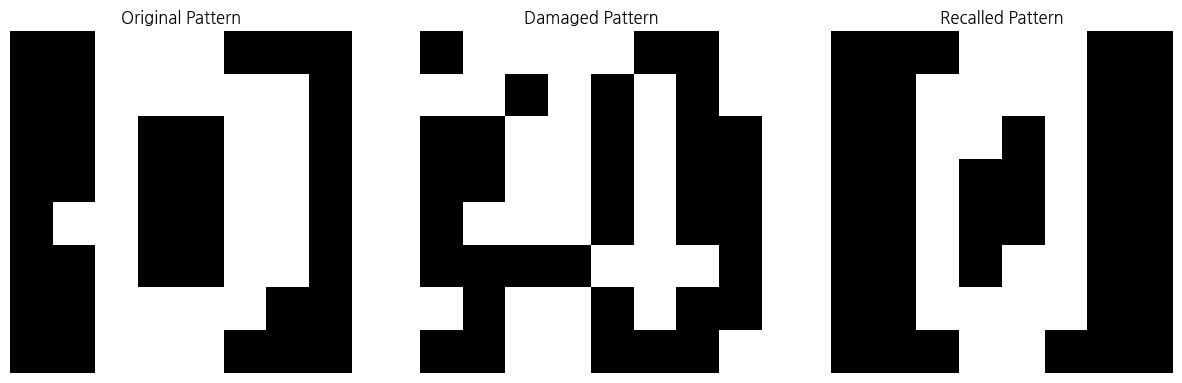

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

class HopfieldNetwork:
   def __init__(self, num_neurons):
       self.num_neurons = num_neurons
       self.weights = np.zeros((num_neurons, num_neurons))

   def train(self, patterns):
       for pattern in patterns:
           pattern = pattern.reshape(-1, 1)
           self.weights += np.dot(pattern, pattern.T)
       np.fill_diagonal(self.weights, 0)

   def recall(self, pattern, steps=10):
       for _ in range(steps):
           for i in range(self.num_neurons):
               net_input = np.dot(self.weights[i], pattern)
               pattern[i] = 1 if net_input > 0 else -1
       return pattern

# MNIST 데이터셋의 digits 로드
digits = load_digits()
X = digits.images
y = digits.target

# 데이터 전처리: -1과 1로 변환
def preprocess_pattern(image):
   return np.where(image > image.mean(), 1, -1).flatten().astype(np.float32)

# 숫자 0과 1의 이미지만 선택
zero_indices = np.where(y == 0)[0][:5]  # 숫자 0의 처음 5개 이미지
one_indices = np.where(y == 1)[0][:5]   # 숫자 1의 처음 5개 이미지

patterns = []
for idx in np.concatenate([zero_indices, one_indices]):
   pattern = preprocess_pattern(X[idx])
   patterns.append(pattern)

# 네트워크 초기화 및 학습
num_neurons = 64  # 8x8 이미지
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 첫 번째 패턴(숫자 0)에 노이즈 추가
original_pattern = patterns[0]
damaged_pattern = original_pattern.copy()
noise_indices = np.random.choice(num_neurons, 20, replace=False)
damaged_pattern[noise_indices] *= -1

# 패턴 복원
recalled_pattern = hopfield_net.recall(damaged_pattern.copy())

# 시각화 함수
def plot_comparison(original, damaged, recalled):
   fig, axes = plt.subplots(1, 3, figsize=(15, 5))
   images = [original, damaged, recalled]
   titles = ["Original Pattern", "Damaged Pattern", "Recalled Pattern"]

   for ax, img, title in zip(axes, images, titles):
       img_reshaped = img.reshape(8, 8)
       ax.imshow(img_reshaped, cmap='gray')
       ax.set_title(title)
       ax.axis('off')
   plt.show()

# 모든 학습 패턴 시각화
def plot_training_patterns(patterns):
   n = len(patterns)
   fig, axes = plt.subplots(2, 5, figsize=(15, 6))
   axes = axes.ravel()

   for i, pattern in enumerate(patterns):
       img_reshaped = pattern.reshape(8, 8)
       axes[i].imshow(img_reshaped, cmap='gray')
       axes[i].set_title(f'Pattern {i+1}')
       axes[i].axis('off')
   plt.tight_layout()
   plt.show()

# 결과 시각화
print("Training Patterns:")
plot_training_patterns(patterns)

print("\nPattern Recovery Test:")
plot_comparison(original_pattern, damaged_pattern, recalled_pattern)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Original Training Images:


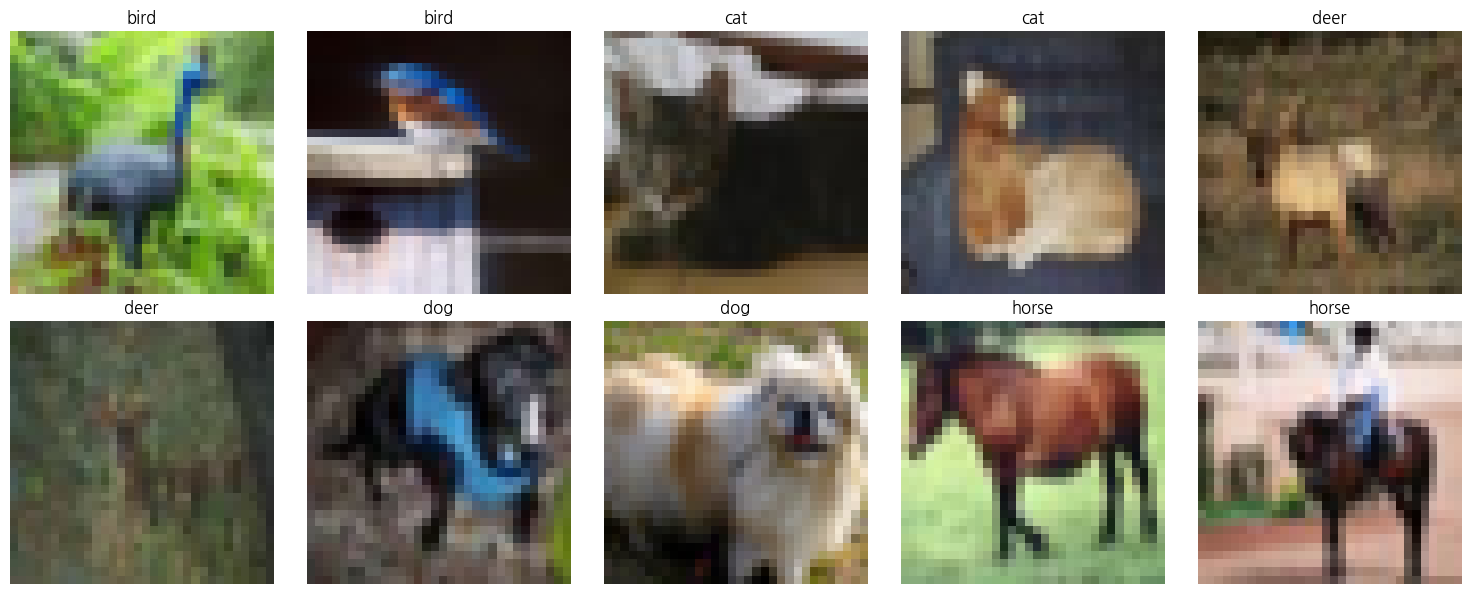


Binary Patterns:


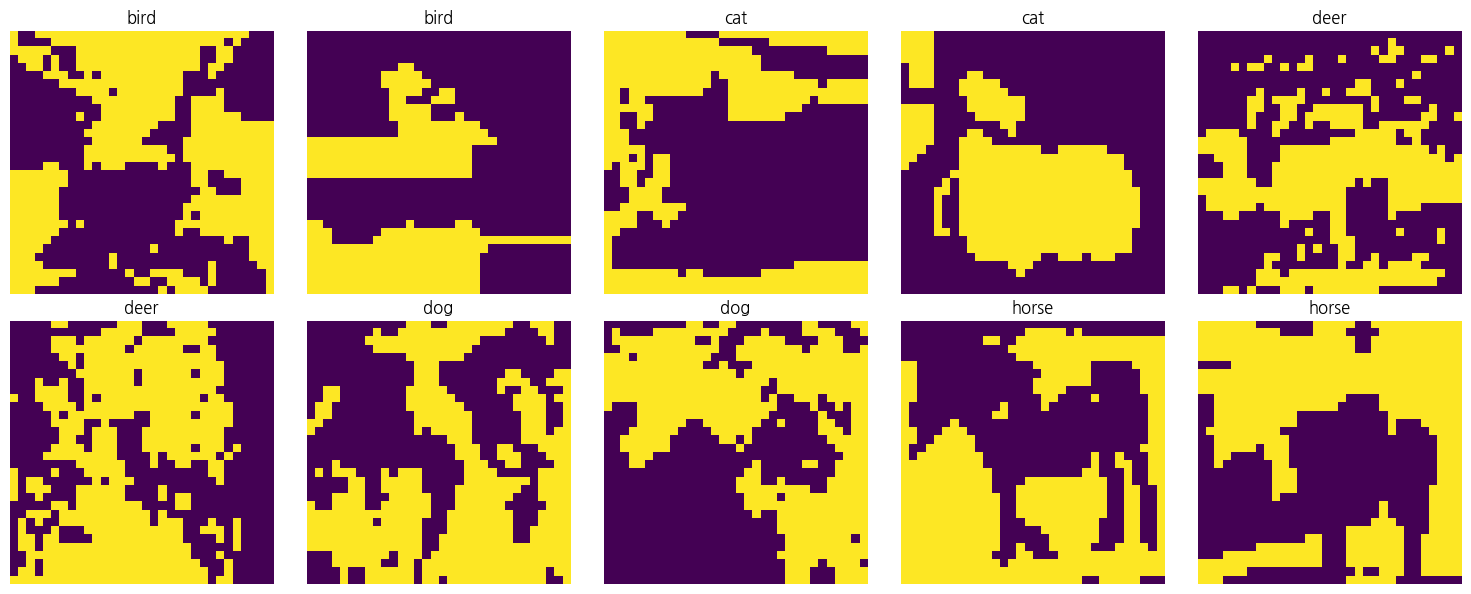


Pattern Recovery Test:


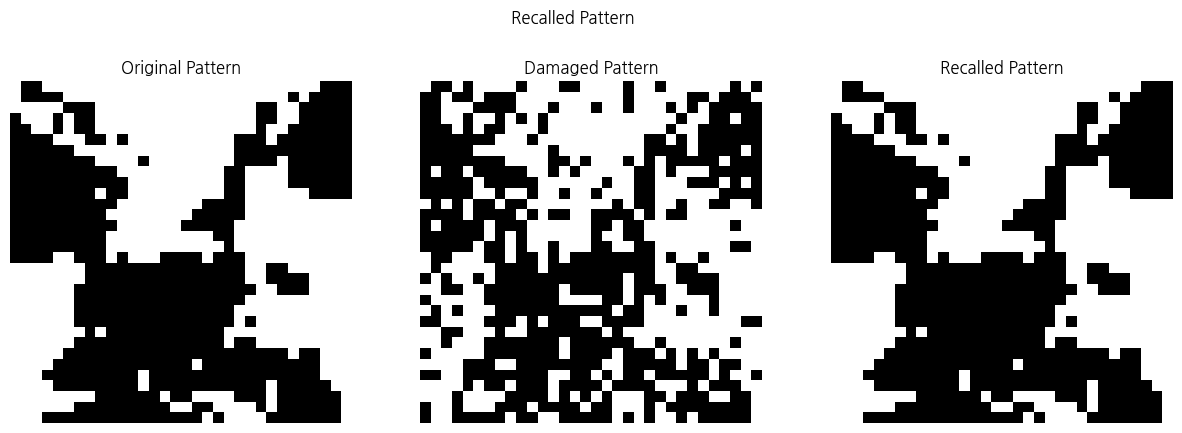

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

class HopfieldNetwork:
   def __init__(self, num_neurons):
       self.num_neurons = num_neurons
       self.weights = np.zeros((num_neurons, num_neurons))

   def train(self, patterns):
       for pattern in patterns:
           pattern = pattern.reshape(-1, 1)
           self.weights += np.dot(pattern, pattern.T)
       np.fill_diagonal(self.weights, 0)

   def recall(self, pattern, steps=10):
       for _ in range(steps):
           for i in range(self.num_neurons):
               net_input = np.dot(self.weights[i], pattern)
               pattern[i] = 1 if net_input > 0 else -1
       return pattern

# CIFAR-10 데이터셋 로드
(X_train, y_train), (_, _) = cifar10.load_data()

# CIFAR-10 클래스 이름들
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

# 동물 클래스 인덱스 (bird=2, cat=3, deer=4, dog=5, horse=7)
animal_indices = [2, 3, 4, 5, 7]

# 동물 이미지만 선택
animal_images = []
animal_labels = []
for animal_idx in animal_indices:
   # 각 동물 클래스에서 2개의 이미지만 선택
   class_indices = np.where(y_train == animal_idx)[0][:2]
   for idx in class_indices:
       animal_images.append(X_train[idx])
       animal_labels.append(class_names[animal_idx])

# 이미지 전처리 함수
def preprocess_image(image, size=(32, 32)):
   # RGB를 그레이스케일로 변환
   gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
   # 크기 조정
   resized = cv2.resize(gray, size)
   # -1과 1로 이진화
   binary = np.where(resized > resized.mean(), 1, -1).astype(np.float32)
   return binary.flatten()

# 이미지 전처리
patterns = [preprocess_image(img) for img in animal_images]

# 네트워크 초기화 및 학습
num_neurons = 32 * 32  # 32x32 이미지
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# 첫 번째 패턴에 노이즈 추가
original_pattern = patterns[0]
damaged_pattern = original_pattern.copy()
noise_indices = np.random.choice(num_neurons, 200, replace=False)
damaged_pattern[noise_indices] *= -1

# 패턴 복원
recalled_pattern = hopfield_net.recall(damaged_pattern.copy())

# 시각화 함수
def plot_comparison(original, damaged, recalled, title="Pattern Comparison"):
   fig, axes = plt.subplots(1, 3, figsize=(15, 5))
   images = [original, damaged, recalled]
   titles = ["Original Pattern", "Damaged Pattern", "Recalled Pattern"]

   for ax, img, title in zip(axes, images, titles):
       img_reshaped = img.reshape(32, 32)
       ax.imshow(img_reshaped, cmap='gray')
       ax.set_title(title)
       ax.axis('off')
   plt.suptitle(title)
   plt.show()

# 모든 학습 패턴 시각화
def plot_training_patterns(images, labels):
   n = len(images)
   cols = 5
   rows = (n + cols - 1) // cols
   fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
   axes = axes.ravel()

   for i in range(len(images)):
       axes[i].imshow(images[i])
       axes[i].set_title(labels[i])
       axes[i].axis('off')

   # 빈 서브플롯 숨기기
   for i in range(len(images), len(axes)):
       axes[i].axis('off')

   plt.tight_layout()
   plt.show()

# 원본 이미지와 학습 패턴 시각화
print("Original Training Images:")
plot_training_patterns(animal_images, animal_labels)

print("\nBinary Patterns:")
binary_images = [pattern.reshape(32, 32) for pattern in patterns]
plot_training_patterns(binary_images, animal_labels)

# 노이즈 추가 및 복원 결과 시각화
print("\nPattern Recovery Test:")
plot_comparison(original_pattern, damaged_pattern, recalled_pattern,
              f"Recovery Test for {animal_labels[0]}")